<a href="https://colab.research.google.com/github/kenioye-afk/ICU-prediction/blob/main/Copy_of_ICU_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Set up and Data Loading


In [ ]:
!pip install pandas numpy xgboost lightgbm shap lime explainerdashboard optuna imbalanced-learn langchain_openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of explainerdashboard to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.8/287.8 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.7/84.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.1/489.1 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.5/152.5 kB 11.4 MB/s eta 0:00:00
   ━

In [ ]:
import pandas as pd
import numpy as np

# Defining the file name for the dataset
file_name = "Kaggle_Sirio_Libanes_ICU_Prediction.xlsx"

try:
    # Loading the dataset into a pandas DataFrame
    df = pd.read_excel ("/content/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")
    print(f"Successfully loaded {file_name}. Shape: {df.shape}")

    # Initial Inspection: Displaying the first 5 rows
    print("\n" + "="*50)
    print("DataFrame Head (First 5 Rows)")
    print("="*50)
    # for clean output in various environments
    print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

    # Initial Inspection: Displaying column information (types and missing values)
    print("\n" + "="*50)
    print("DataFrame Info (Column Types and Non-Null Counts)")
    print("="*50)
    df.info()

    # Initial Inspection: Descriptive statistics (Check Scaling)
    print("\n" + "="*50)
    print("Descriptive Statistics (Checking if features are scaled Min/Max of -1/1)")
    print("="*50)
    # Using T to transpose the output for better readability due to the large number of columns
    # Displaying min/max values confirms the features are scaled between -1 and 1
    stats_check = df.describe().T[['min', 'max']]
    print(stats_check.head(10).to_markdown(numalign="left", stralign="left"))

except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")
except Exception as e:
    print(f"An unexpected error occurred during loading: {e}")

Successfully loaded Kaggle_Sirio_Libanes_ICU_Prediction.xlsx. Shape: (1925, 231)

DataFrame Head (First 5 Rows)
| PATIENT_VISIT_IDENTIFIER   | AGE_ABOVE65   | AGE_PERCENTIL   | GENDER   | DISEASE GROUPING 1   | DISEASE GROUPING 2   | DISEASE GROUPING 3   | DISEASE GROUPING 4   | DISEASE GROUPING 5   | DISEASE GROUPING 6   | HTN   | IMMUNOCOMPROMISED   | OTHER   | ALBUMIN_MEDIAN   | ALBUMIN_MEAN   | ALBUMIN_MIN   | ALBUMIN_MAX   | ALBUMIN_DIFF   | BE_ARTERIAL_MEDIAN   | BE_ARTERIAL_MEAN   | BE_ARTERIAL_MIN   | BE_ARTERIAL_MAX   | BE_ARTERIAL_DIFF   | BE_VENOUS_MEDIAN   | BE_VENOUS_MEAN   | BE_VENOUS_MIN   | BE_VENOUS_MAX   | BE_VENOUS_DIFF   | BIC_ARTERIAL_MEDIAN   | BIC_ARTERIAL_MEAN   | BIC_ARTERIAL_MIN   | BIC_ARTERIAL_MAX   | BIC_ARTERIAL_DIFF   | BIC_VENOUS_MEDIAN   | BIC_VENOUS_MEAN   | BIC_VENOUS_MIN   | BIC_VENOUS_MAX   | BIC_VENOUS_DIFF   | BILLIRUBIN_MEDIAN   | BILLIRUBIN_MEAN   | BILLIRUBIN_MIN   | BILLIRUBIN_MAX   | BILLIRUBIN_DIFF   | BLAST_MEDIAN   | BLAST_MEAN   | BLAST_M

In [ ]:
df.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,...,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,...,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.976190,-0.979798,-1.000000,-0.984944,-0.989822,-1.000000,-0.975924,-0.980333,0.000000
75%,288.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.647059,-0.595238,-0.878788,-0.645482,-0.522176,-0.662529,-0.634409,-0.594677,-0.880155,1.000000
max,384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 2. Data Preparation and Splitting

In [ ]:

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


# Identifying Target and Features

# Dropping the patient identifier columns as they are not predictive
df = df.drop(columns=['PATIENT_VISIT_IDENTIFIER'], errors='ignore')

# Separating the target variable (y) from the features (X)
# The target is the 'ICU' column
y = df['ICU']
X = df.drop(columns=['ICU'])

# Handling Categorical Features (One-Hot Encoding)

# Identifying the categorical columns that are not simple binary (0/1)
categorical_cols = X.select_dtypes(include=['object']).columns

# 'AGE_PERCENTIL' and 'WINDOW' columns need to be converted to numerical.
# Using pd.get_dummies for One-Hot Encoding on these columns.
X = pd.get_dummies(X, columns=categorical_cols, dummy_na=False)

print("\n" + "="*50)
print("Shape after One-Hot Encoding:")
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print("="*50)



# Splitting Data into Training and Testing Sets (80/20 split)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\n" + "="*50)
print("Data Splitting Complete")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"ICU ratio in y_train: {y_train.sum() / len(y_train):.2f}")
print(f"ICU ratio in y_test: {y_test.sum() / len(y_test):.2f}")
print("="*50)


Shape after One-Hot Encoding:
Features (X) shape: (1925, 242)
Target (y) shape: (1925,)

Data Splitting Complete
X_train shape: (1540, 242)
X_test shape: (385, 242)
ICU ratio in y_train: 0.27
ICU ratio in y_test: 0.27


# 3. Model Training and Evaluation

Training Random Forest
Training XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:31:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Logistic Regression
Training LightGBM

 Random Forest (Baseline) Performance 
Accuracy: 0.8935
ROC AUC Score: 0.9144

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       282
           1       0.88      0.70      0.78       103

    accuracy                           0.89       385
   macro avg       0.89      0.83      0.85       385
weighted avg       0.89      0.89      0.89       385



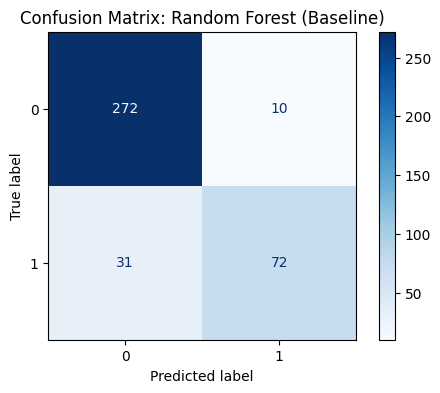


 XGBoost (Baseline) Performance 
Accuracy: 0.8883
ROC AUC Score: 0.9453

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       282
           1       0.86      0.70      0.77       103

    accuracy                           0.89       385
   macro avg       0.88      0.83      0.85       385
weighted avg       0.89      0.89      0.88       385



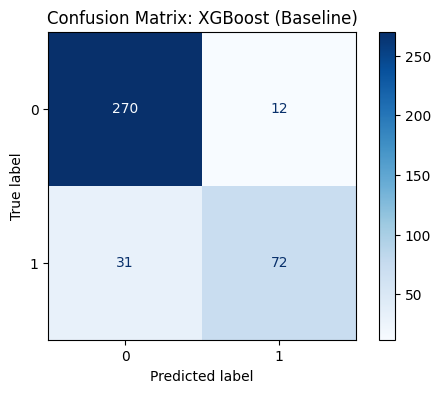


 Logistic Regression (Linear) Performance 
Accuracy: 0.8883
ROC AUC Score: 0.9145

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       282
           1       0.89      0.66      0.76       103

    accuracy                           0.89       385
   macro avg       0.89      0.82      0.84       385
weighted avg       0.89      0.89      0.88       385



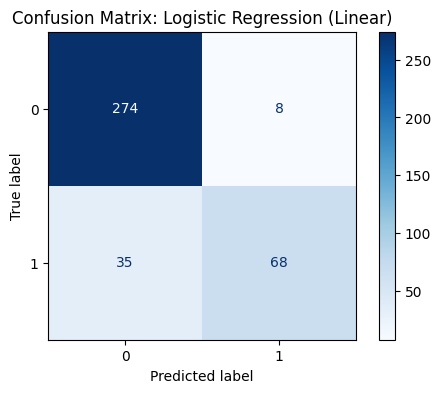


 LightGBM (Boosting) Performance 
Accuracy: 0.8935
ROC AUC Score: 0.9447

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       282
           1       0.89      0.69      0.78       103

    accuracy                           0.89       385
   macro avg       0.89      0.83      0.85       385
weighted avg       0.89      0.89      0.89       385



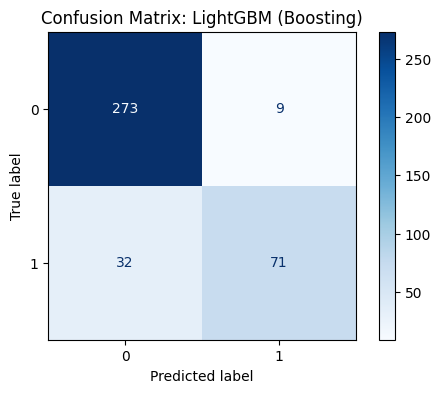

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer # Import SimpleImputer


# Imputing missing values after splitting the data
imputer = SimpleImputer(strategy='mean')

# Fit on X_train and transform both X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Converting the imputed arrays back to DataFrames, retaining column names and index
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns, index=X_test.index)

# Initializing the Models
# We use random_state=42 for reproducibility of results.
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
log_reg = LogisticRegression(max_iter=1000, random_state=42)
lgbm_model = LGBMClassifier(random_state=42, verbose=-1)

# Training the Models
print("Training Random Forest")
rf_model.fit(X_train, y_train)

print("Training XGBoost")
xgb_model.fit(X_train, y_train)

print("Training Logistic Regression")
log_reg.fit(X_train, y_train)

print("Training LightGBM")
lgbm_model.fit(X_train, y_train)

# Storing models in a dictionary for easy access in later cells
models = {
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "Logistic Regression": log_reg,
    "LightGBM": lgbm_model
}

# Model Evaluation Function
def evaluate_model(model, X_test, y_test, model_name):
    # Predict classes and probabilities
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculating Metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba)

    print(f"\n {model_name} Performance ")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC Score: {auc_roc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plotting the Confusion Matrix
    fig, ax = plt.subplots(figsize=(6, 4))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax, cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

# Running Evaluation
evaluate_model(rf_model, X_test, y_test, "Random Forest (Baseline)")
evaluate_model(xgb_model, X_test, y_test, "XGBoost (Baseline)")
evaluate_model(log_reg, X_test, y_test, "Logistic Regression (Linear)")
evaluate_model(lgbm_model, X_test, y_test, "LightGBM (Boosting)")


 Model Comparison Table (Sorted by F1-Score)
| Model               |   F1-Score |   Recall |   Precision |   ROC AUC |   Accuracy |
|:--------------------|-----------:|---------:|------------:|----------:|-----------:|
| Random Forest       |   0.778378 | 0.699029 |    0.878049 |  0.914412 |   0.893506 |
| LightGBM            |   0.775956 | 0.68932  |    0.8875   |  0.944674 |   0.893506 |
| XGBoost             |   0.770053 | 0.699029 |    0.857143 |  0.945259 |   0.888312 |
| Logistic Regression |   0.759777 | 0.660194 |    0.894737 |  0.91448  |   0.888312 |


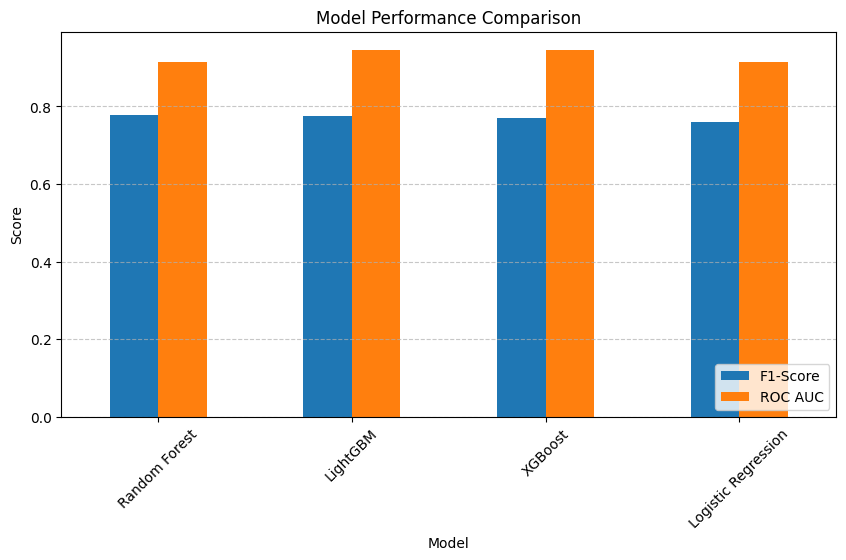

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score

# Creating a function to extract all relevant metrics
def get_metrics(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    return {
        "Model": name,
        "F1-Score": f1_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba),
        "Accuracy": accuracy_score(y_test, y_pred)
    }

# Collecting results for all 4 models
results = [
    get_metrics(log_reg, X_test, y_test, "Logistic Regression"),
    get_metrics(rf_model, X_test, y_test, "Random Forest"),
    get_metrics(xgb_model, X_test, y_test, "XGBoost"),
    get_metrics(lgbm_model, X_test, y_test, "LightGBM")
]

# Creating the Comparison DataFrame
comparison_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)

print("\n Model Comparison Table (Sorted by F1-Score)")
print(comparison_df.to_markdown(index=False))

# Visualization: F1-Score vs. ROC AUC
comparison_df.set_index("Model")[["F1-Score", "ROC AUC"]].plot(kind='bar', figsize=(10, 5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()

# 4. Baseline Feature Importance (XGBoost)


 Top 10 Features (Built-in XGBoost Importance) 


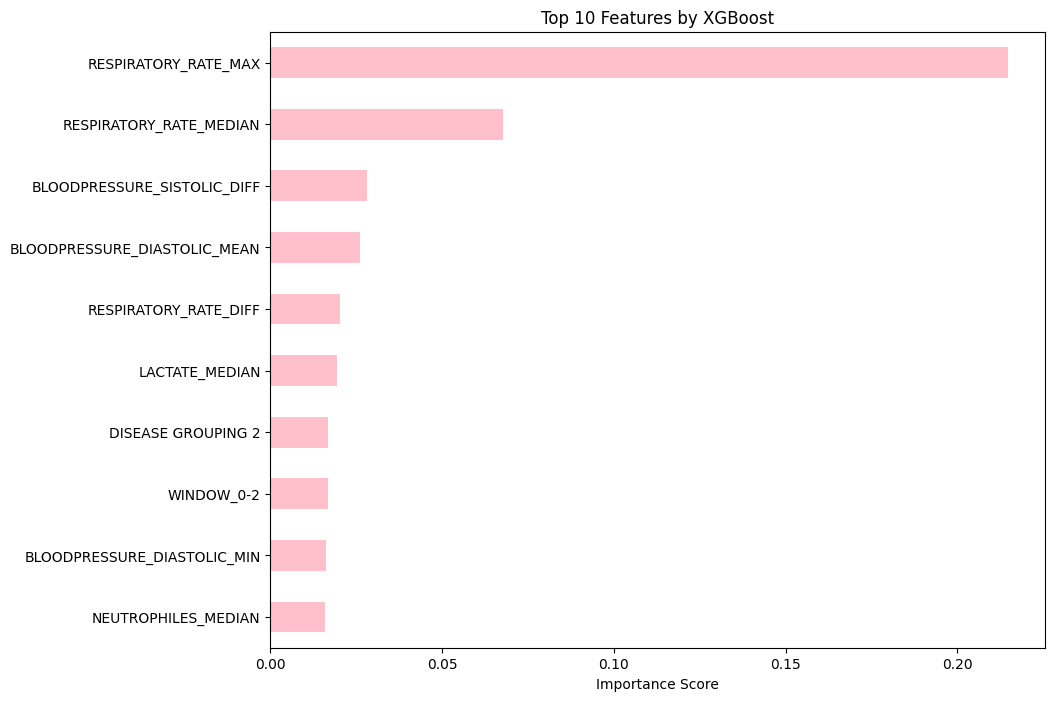

In [ ]:
print("\n Top 10 Features (Built-in XGBoost Importance) ")
# Calculating Important Features from the XGBoost model
important_features = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
top_10_features = important_features.nlargest(10) # Using nlargest to get top 10

plt.figure(figsize=(10, 8))
top_10_features.plot(kind='barh', color='pink')
plt.title("Top 10 Features by XGBoost")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()


# 5. GridSearch Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report

# Defining the parameter grid
# GridSearch test every single combination of these values
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Initializing GridSearchCV using F1
grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

print("Starting GridSearch...")
grid_search.fit(X_train, y_train)

# Best Model from GridSearch
best_grid_model = grid_search.best_estimator_
grid_f1 = f1_score(y_test, best_grid_model.predict(X_test))

print("\n" + "="*40)
print(f"GridSearch Best F1-Score: {grid_f1:.4f}")
print(f"GridSearch Best Params: {grid_search.best_params_}")
print("="*40)



Starting GridSearch...
Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:38:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



GridSearch Best F1-Score: 0.7609
GridSearch Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


# 6. Hyperparameter Tuning with Optuna (Using XGBoost)

In [ ]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

def objective(trial):
    # Defining the range of hyperparameters to search
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'use_label_encoder': False,
        'eval_metric': 'logloss',
        'random_state': 42
    }

    # Initializing model with suggested parameters
    model = XGBClassifier(**param)

    # Training the model
    model.fit(X_train, y_train)

    # Predicting on test set
    preds = model.predict(X_test)

    # Calculating F1-Score (The Target Metric)
    score = f1_score(y_test, preds)

    return score # Optuna maximizes this

# Creating a study and run the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("\n" + "="*30)
print("OPTUNA TUNING COMPLETED")
print(f"Best F1-Score: {study.best_value:.4f}")
print(f"Best Hyperparameters: {study.best_params}")
print("="*30)

[I 2026-01-07 12:38:28,828] A new study created in memory with name: no-name-31c0866a-551e-4ea4-9655-5dfd5382d0a1
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:38:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2026-01-07 12:38:30,645] Trial 0 finished with value: 0.782608695652174 and parameters: {'n_estimators': 319, 'max_depth': 6, 'learning_rate': 0.013115034232821236, 'subsample': 0.8436922143775185, 'colsample_bytree': 0.9560036566658343, 'gamma': 3.5769989148740686, 'min_child_weight': 2}. Best is trial 0 with value: 0.782608695652174.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:38:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2026-01-07 12:38:32,153] Trial 1 finished with value: 0.7752808988764045 and parameters: {'n


OPTUNA TUNING COMPLETED
Best F1-Score: 0.8085
Best Hyperparameters: {'n_estimators': 574, 'max_depth': 4, 'learning_rate': 0.1970741975758891, 'subsample': 0.6396148849832445, 'colsample_bytree': 0.7638283912251307, 'gamma': 3.827514594094368, 'min_child_weight': 4}


In [ ]:
# Comparing GridSearch with Optuna result
if grid_f1 < 0.8085:
    print("Optuna's optimization outperformed GridSearch.")
else:
    print("GridSearch outperfomed Optuna.")

Optuna's optimization outperformed GridSearch.


# 7. Training the Final Model

In [ ]:
# Training the final model with the best parameters found by Optuna
final_xgb_model = XGBClassifier(**study.best_params, use_label_encoder=False, eval_metric='logloss')
final_xgb_model.fit(X_train, y_train)

# Final validation check
final_preds = final_xgb_model.predict(X_test)
print(f"Final Optimized F1-Score: {f1_score(y_test, final_preds):.4f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:39:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Final Optimized F1-Score: 0.7735


# 8. Shap Analysis


 Generating Global Clinical Insights 


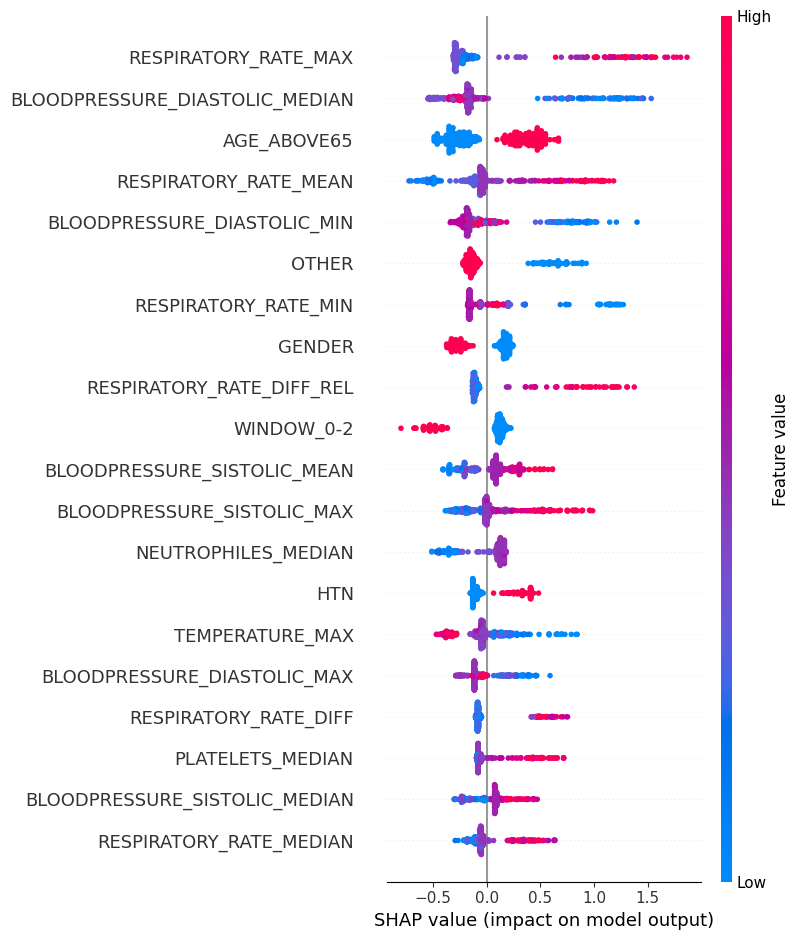


 Case Study: Patient at Index 0 
Model Prediction: No ICU
Actual Outcome: No ICU


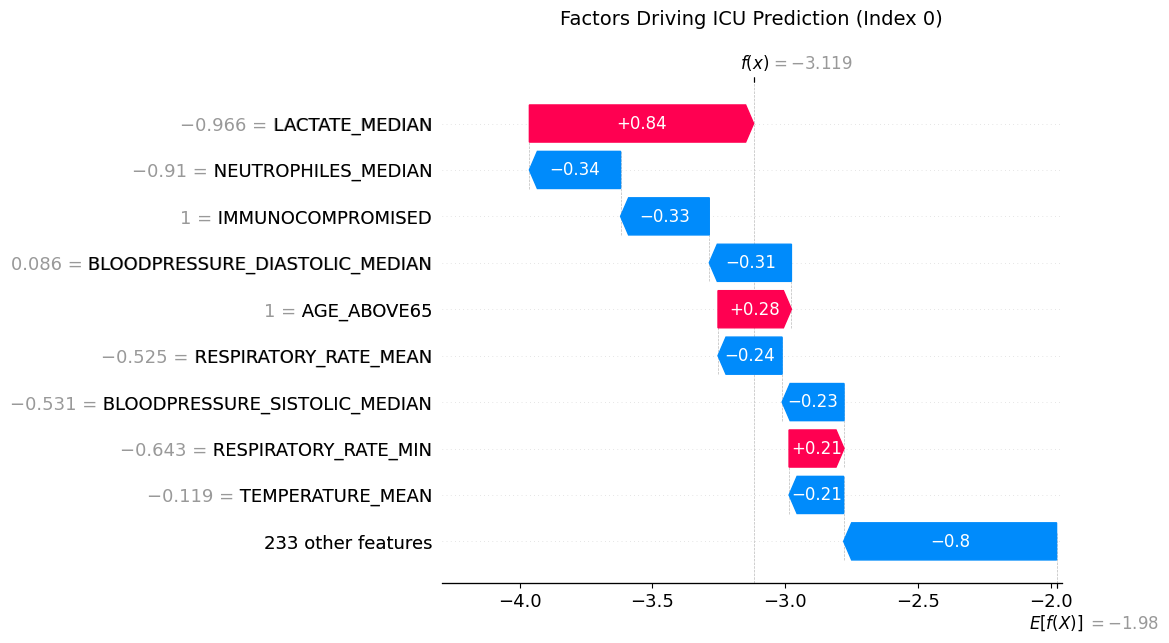

In [ ]:
import shap
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
import matplotlib.pyplot as plt

# Using shap.Explainer for more flexibility and direct Explanation objects
explainer = shap.Explainer(final_xgb_model, X_test, link=shap.links.logit)
shap_values_explanation = explainer(X_test)

print("\n Generating Global Clinical Insights ")
# Red = High value of feature, Blue = Low value
shap.summary_plot(shap_values_explanation, X_test)

# Local Explanation (Single Patient Case Study)
# Explaining the prediction for the first patient in our test set
patient_index = 0
patient_data = X_test.iloc[patient_index, :]
patient_prediction = final_xgb_model.predict(patient_data.values.reshape(1, -1))[0]
actual_outcome = y_test.iloc[patient_index]

print(f"\n Case Study: Patient at Index {patient_index} ")
print(f"Model Prediction: {'ICU Needed' if patient_prediction == 1 else 'No ICU'}")
print(f"Actual Outcome: {'ICU Needed' if actual_outcome == 1 else 'No ICU'}")

# Waterfall plot shows how each lab result pushed the probability up or down
# The shap_values_explanation object can be indexed for a specific patient's explanation
patient_explanation_for_waterfall = shap_values_explanation[patient_index]

# Creating the Waterfall Plot
plt.figure(figsize=(10, 6))
shap.plots.waterfall(patient_explanation_for_waterfall, max_display=10, show=False)

# Customizing the title for clinical context
plt.title(f"Factors Driving ICU Prediction (Index {patient_index})", fontsize=14, pad=20)
plt.show()

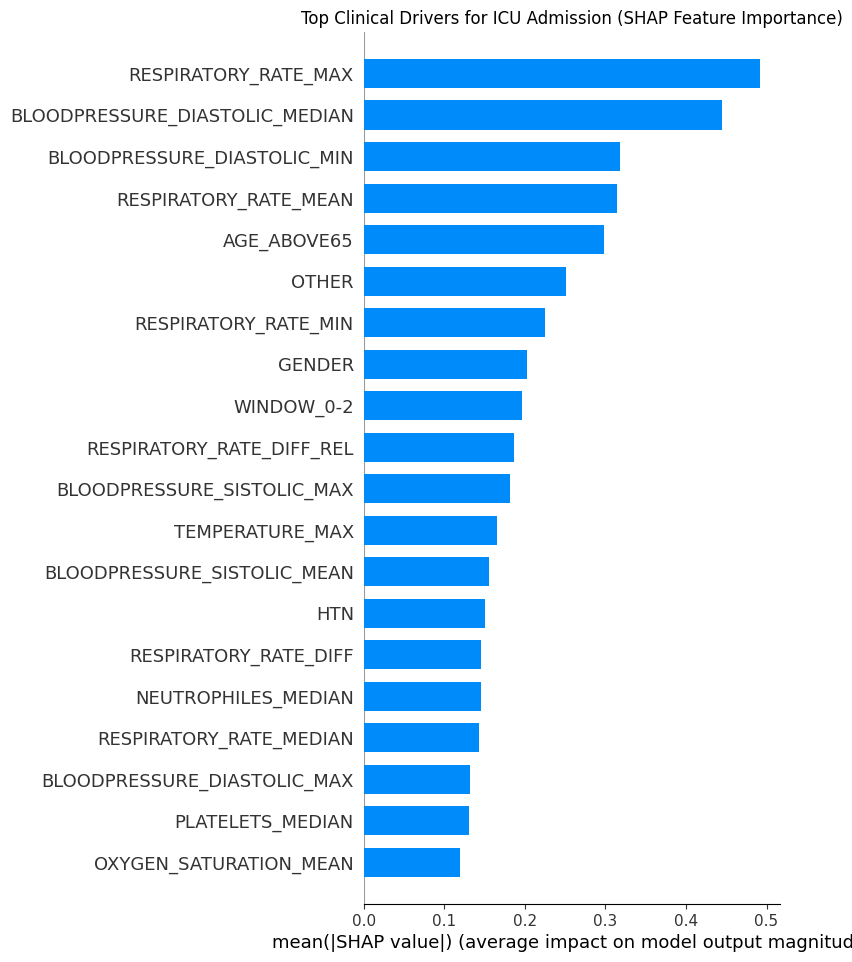

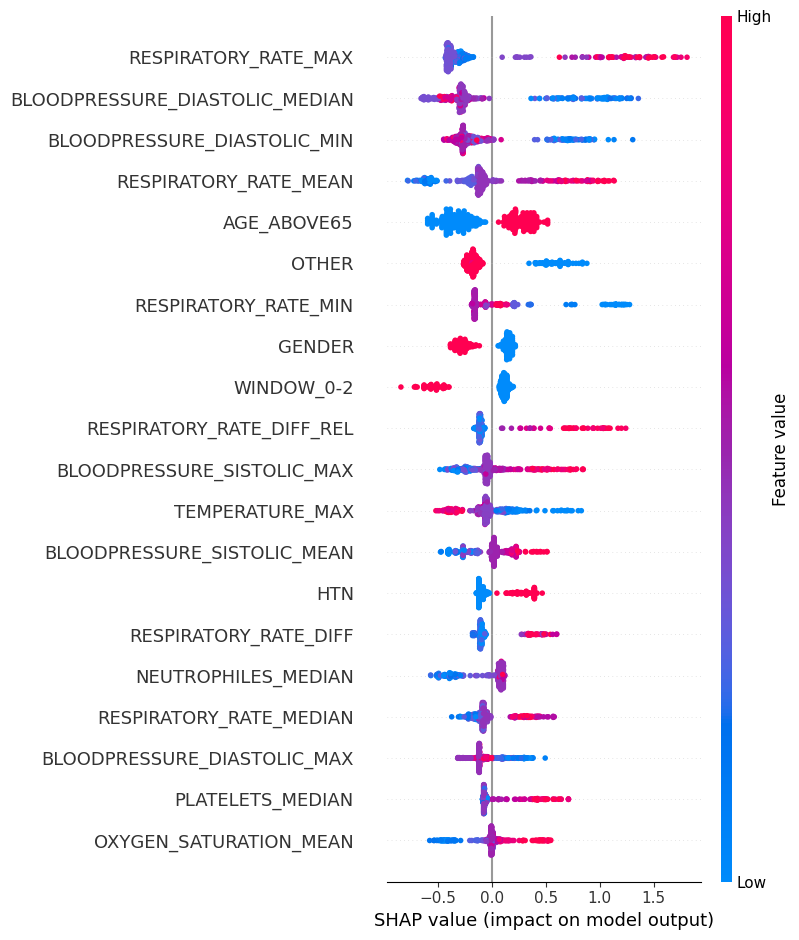

In [ ]:
# Initializing SHAP explainer
explainer = shap.TreeExplainer(final_xgb_model)
shap_values = explainer.shap_values(X_test)

# Generating Summary Plot
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("Top Clinical Drivers for ICU Admission (SHAP Feature Importance)")
plt.show()


# Beeswarm Plot
shap.summary_plot(shap_values, X_test)


# 9. Lime Analysis

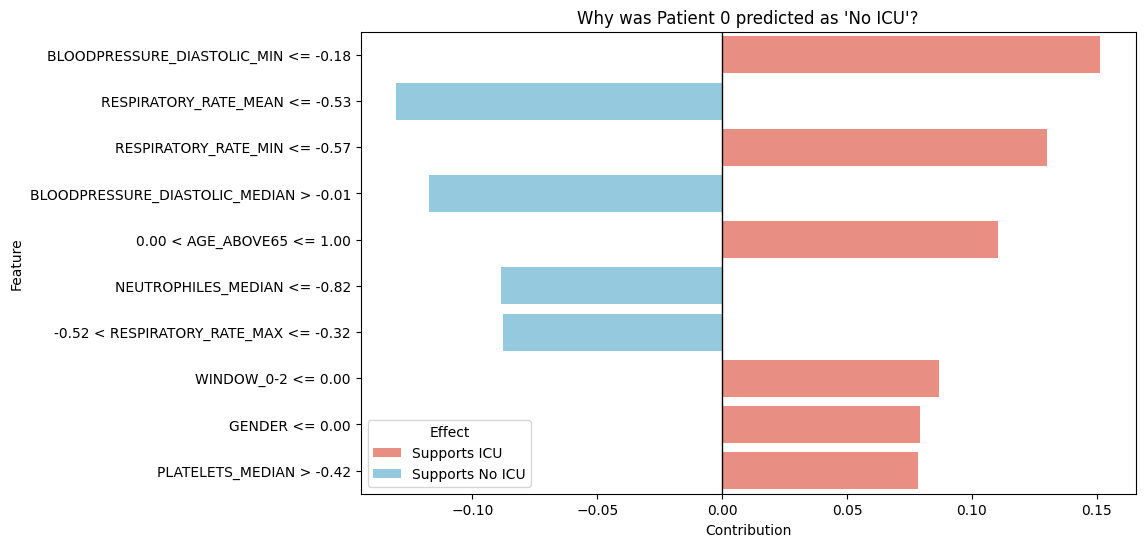

In [ ]:
import lime
import lime.lime_tabular
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for plotting

# Assuming final_xgb_model, X_train, X_test, y_test are available from previous cells

# Initializing the LIME Explainer
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values, # LIME expects numpy arrays
    feature_names=X_train.columns.tolist(),
    class_names=['No ICU', 'ICU'], # Assuming 0: No ICU, 1: ICU
    mode='classification'
)

# Selecting a patient for local explanation (e.g., the first patient from X_test)
patient_index = 0 # Using the same patient index as SHAP analysis for consistency
patient_data_for_lime = X_test.iloc[patient_index].values

# Generating the explanation for the selected patient
exp = explainer_lime.explain_instance(
    data_row=patient_data_for_lime,
    predict_fn=final_xgb_model.predict_proba,
    num_features=10 # Number of features to include in the explanation
)

# Converting LIME explanation to a DataFrame
feature_importance = exp.as_list()
df_lime = pd.DataFrame(feature_importance, columns=['Feature', 'Contribution'])

# Adding a Color column based on positive/negative contribution
df_lime['Effect'] = df_lime['Contribution'].apply(lambda x: 'Supports ICU' if x > 0 else 'Supports No ICU')

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Contribution', y='Feature', data=df_lime, hue='Effect',
            palette={'Supports ICU': 'salmon', 'Supports No ICU': 'skyblue'})

plt.axvline(x=0, color='black', linestyle='-', linewidth=1) # Add a zero line
# Using patient_index for the title, assuming it's available or explicitly set
plt.title(f"Why was Patient {patient_index} predicted as '{'ICU' if y_test.iloc[patient_index] == 1 else 'No ICU'}'?")
plt.show()

In [ ]:
# Creating a diagnostic dataframe
results_df = pd.DataFrame({
    'Actual': y_test,
    'Prob_ICU': final_xgb_model.predict_proba(X_test)[:, 1],
    'Prediction': final_xgb_model.predict(X_test)
}, index=X_test.index)

# False Negatives: Predicted "No ICU" but actually "Needed ICU" (Safety Risk)
false_negatives = results_df[(results_df['Actual'] == 1) & (results_df['Prediction'] == 0)]

# False Positives: Predicted "ICU" but "Not Needed" (Resource Strain)
false_positives = results_df[(results_df['Actual'] == 0) & (results_df['Prediction'] == 1)]

# High Confidence/High Risk: Correctly predicted ICU with >90% probability
high_risk_correct = results_df[(results_df['Actual'] == 1) & (results_df['Prob_ICU'] > 0.9)]

# High Confidence/Low Risk: Correctly predicted No ICU with >90% probability
low_risk_correct = results_df[(results_df['Actual'] == 0) & (results_df['Prob_ICU'] < 0.1)]

print(f"Total False Negatives found: {len(false_negatives)}")
print(f"Total False Positives found: {len(false_positives)}")
print(f"Total high risk found: {len(high_risk_correct)}")
print(f"Total low risk found: {len(low_risk_correct)}")

Total False Negatives found: 33
Total False Positives found: 8
Total high risk found: 48
Total low risk found: 196


In [ ]:
# Identifying the top 10 features from SHAP
vals = np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(X_train.columns, vals)), columns=['col_name', 'feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)

print("Top 10 Model-Derived Clinical Indicators:")
print(feature_importance.head(10))

Top 10 Model-Derived Clinical Indicators:
                           col_name  feature_importance_vals
212            RESPIRATORY_RATE_MAX                 0.492107
197  BLOODPRESSURE_DIASTOLIC_MEDIAN                 0.444345
203     BLOODPRESSURE_DIASTOLIC_MIN                 0.317580
194           RESPIRATORY_RATE_MEAN                 0.313893
0                       AGE_ABOVE65                 0.297906
10                            OTHER                 0.250512
206            RESPIRATORY_RATE_MIN                 0.225370
1                            GENDER                 0.203212
237                      WINDOW_0-2                 0.196255
224       RESPIRATORY_RATE_DIFF_REL                 0.186265
